In [ ]:
import numpy as np
import pandas as pd

In [ ]:
g1 = pd.DataFrame(np.random.randint(80,100, size=(40000,5)), columns = ["English",'Mathematics','Islamiat','Science','Urdu'])
g2 = pd.DataFrame(np.random.randint(70,79, size=(40000,5)), columns = ["English",'Mathematics','Islamiat','Science','Urdu'])
g3 = pd.DataFrame(np.random.randint(60,69, size=(40000,5)), columns = ["English",'Mathematics','Islamiat','Science','Urdu'])
g4 = pd.DataFrame(np.random.randint(50,59, size=(40000,5)), columns = ["English",'Mathematics','Islamiat','Science','Urdu'])
g5 = pd.DataFrame(np.random.randint(40,49, size=(40000,5)), columns = ["English",'Mathematics','Islamiat','Science','Urdu'])
g6 = pd.DataFrame(np.random.randint(33,39, size=(800000,5)), columns = ["English",'Mathematics','Islamiat','Science','Urdu'])
g7 = pd.DataFrame(np.random.randint(0,32, size=(40000,5)), columns = ["English",'Mathematics','Islamiat','Science','Urdu'])

df = pd.concat([g1,g2,g3,g4,g5,g6,g7])
print(len(df))
df = df.drop_duplicates()# get all unique records
print(len(df))
df.head()

1040000
203788


,English,Mathematics,Islamiat,Science,Urdu
0,90,82,95,85,90
1,94,94,85,83,84
2,86,82,81,85,88
3,86,95,97,88,80
4,89,80,83,89,90


In [ ]:
df.tail()

,English,Mathematics,Islamiat,Science,Urdu
39995,3,29,17,23,4
39996,19,0,22,11,1
39997,25,8,28,11,27
39998,6,18,11,1,14
39999,26,5,4,21,21


# Symbolic AI

In [ ]:
def grade(English,Mathematics, Islamiat, Science, Urdu):
    total = 500
    obtain = English + Mathematics + Islamiat + Science + Urdu
    per = (obtain / total) * 100

    grade = None

    if per >= 80:
        grade = "A+"
    elif per >= 70:
        grade = "A"
    elif per >= 60:
        grade = "B"
    elif per >= 50:
        grade = "C"
    elif per >= 40:
        grade = "D"
    elif per >= 33:
        grade = "E"
    else:
        grade = "Fail"

    return total, obtain , per , grade

# df[["Total","Obtained","Percentage","Grade"]] = df[["s1","s2","s3","s4","s5"]].apply(lambda x:grade(*x), axis=1, result_type='expand')
df[["Total","Obtained","Percentage","Grade"]] = df[["English","Mathematics","Islamiat","Science","Urdu"]].apply(lambda x:grade(x[0],x[1],x[2],x[3],x[4]), axis=1, result_type='expand')
df

,English,Mathematics,Islamiat,Science,Urdu,Total,Obtained,Percentage,Grade
0,90,82,95,85,90,500,442,88.4,A+
1,94,94,85,83,84,500,440,88.0,A+
2,86,82,81,85,88,500,422,84.4,A+
3,86,95,97,88,80,500,446,89.2,A+
4,89,80,83,89,90,500,431,86.2,A+
...,...,...,...,...,...,...,...,...,...
39995,3,29,17,23,4,500,76,15.2,Fail
39996,19,0,22,11,1,500,53,10.6,Fail
39997,25,8,28,11,27,500,99,19.8,Fail
39998,6,18,11,1,14,500,50,10.0,Fail


In [ ]:
df.Grade.value_counts()
# Fail    39988
# A+      39744
# D       29203
# C       29012
# B       29006
# A       28925
# E        7776

Fail    39977
A+      39751
A       29103
B       29094
D       29071
C       29016
E        7776
Name: Grade, dtype: int64

In [ ]:
df1 = pd.DataFrame()
test = pd.DataFrame()
for i in df.Grade.unique():
    df1 = pd.concat([df1,df[df.Grade==i].head(7776)])
    test = pd.concat([test,df[df.Grade==i].head(100)])
print(len(df1))
print(len(test))

54432
700


# Create data for ML

In [ ]:
data = df1[["English","Mathematics","Islamiat",'Science','Urdu',"Percentage",'Grade']].copy()
data = data.sample(frac=1)
print(len(data))
data

54432


,English,Mathematics,Islamiat,Science,Urdu,Percentage,Grade
3287,56,52,57,50,57,54.4,C
3525,57,55,50,52,54,53.6,C
7148,53,50,53,51,57,52.8,C
95,36,34,33,37,36,35.2,E
6395,90,86,94,90,87,89.4,A+
...,...,...,...,...,...,...,...
7693,65,64,61,64,63,63.4,B
18385,36,37,35,36,36,36.0,E
5441,4,8,12,14,6,8.8,Fail
4070,50,55,58,56,54,54.6,C


In [ ]:
data.corr()

<ipython-input-9-c44ded798807>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,English,Mathematics,Islamiat,Science,Urdu,Percentage
English,1.000000,0.961737,0.961463,0.961886,0.961360,0.984530
Mathematics,0.961737,1.000000,0.961373,0.961671,0.961549,0.984500
Islamiat,0.961463,0.961373,1.000000,0.961395,0.961804,0.984458
Science,0.961886,0.961671,0.961395,1.000000,0.961848,0.984582
Urdu,0.961360,0.961549,0.961804,0.961848,1.000000,0.984548
Percentage,0.984530,0.984500,0.984458,0.984582,0.984548,1.000000


<ipython-input-10-731a21307ff8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar')


<Axes: >

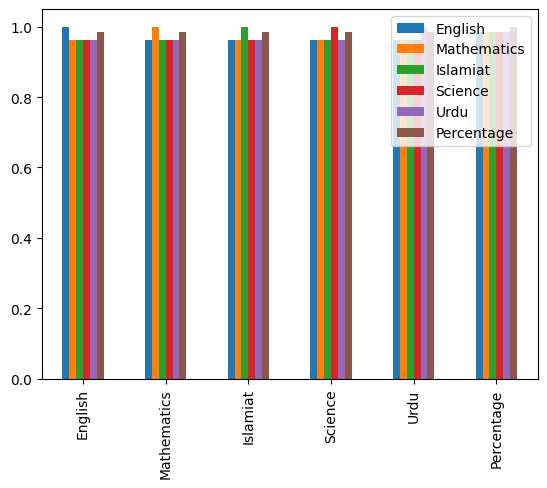

In [ ]:
data.corr().plot(kind='bar')

In [ ]:
grades = {
    "A+":7,
    "A":6,
    "B":5,
    "C":4,
    "D":3,
    "E":2,
    "Fail":1
}

data['Grade1'] = data.Grade.map(grades)# map with dictionary
data

,English,Mathematics,Islamiat,Science,Urdu,Percentage,Grade,Grade1
3287,56,52,57,50,57,54.4,C,4
3525,57,55,50,52,54,53.6,C,4
7148,53,50,53,51,57,52.8,C,4
95,36,34,33,37,36,35.2,E,2
6395,90,86,94,90,87,89.4,A+,7
...,...,...,...,...,...,...,...,...
7693,65,64,61,64,63,63.4,B,5
18385,36,37,35,36,36,36.0,E,2
5441,4,8,12,14,6,8.8,Fail,1
4070,50,55,58,56,54,54.6,C,4


<ipython-input-12-731a21307ff8>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar')


<Axes: >

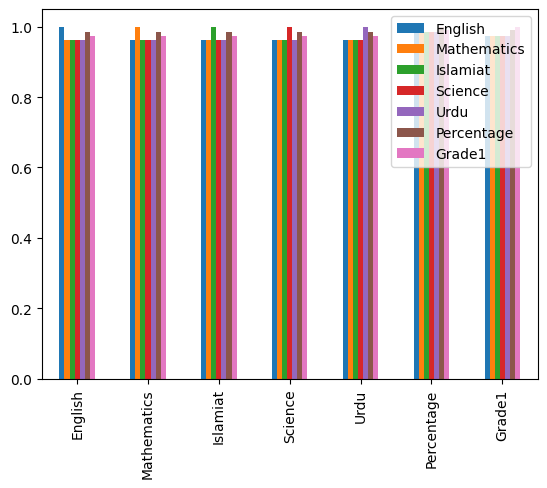

In [ ]:
data.corr().plot(kind='bar')

<ipython-input-13-d64406c76aa6>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr().plot(kind='bar', legend=False)


<Axes: >

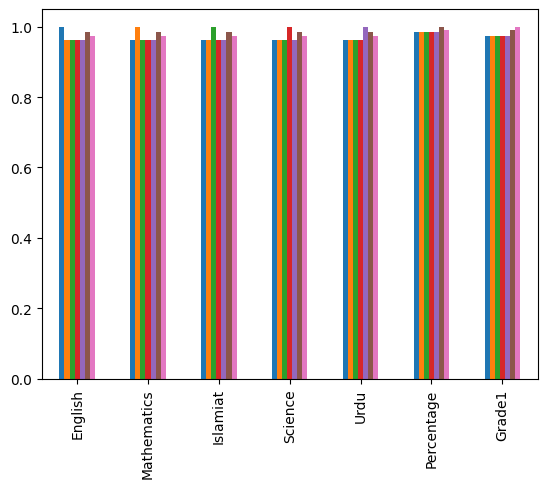

In [ ]:
data.corr().plot(kind='bar', legend=False)

In [ ]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.000000,0.989188
Grade1,0.989188,1.000000


# Find Grade (Rules) with Machine Learning

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
data[["Percentage","Grade1"]].corr()

,Percentage,Grade1
Percentage,1.000000,0.989188
Grade1,0.989188,1.000000


# Now select the feature based on above stats technique

In [ ]:
data.head()

,English,Mathematics,Islamiat,Science,Urdu,Percentage,Grade,Grade1
3287,56,52,57,50,57,54.4,C,4
3525,57,55,50,52,54,53.6,C,4
7148,53,50,53,51,57,52.8,C,4
95,36,34,33,37,36,35.2,E,2
6395,90,86,94,90,87,89.4,A+,7


In [ ]:
feature = ['Percentage']

X = data[feature]
Y = data.Grade



In [ ]:
print(type(X), len(X), type(X.values[0]))
X.head()

<class 'pandas.core.frame.DataFrame'> 54432 <class 'numpy.ndarray'>


,Percentage
3287,54.4
3525,53.6
7148,52.8
95,35.2
6395,89.4


In [ ]:
print(type(Y),len(Y), type(Y.values[0]))
Y.head()

<class 'pandas.core.series.Series'> 54432 <class 'str'>


3287     C
3525     C
7148     C
95       E
6395    A+
Name: Grade, dtype: object

# Split data in Training and Test dataset
* X_train, X_test
* Y_train, Y_test

In [ ]:
print("X len",len(X),"Y len",len(Y))
print("train X",int(54432*70/100))
X_train,X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.3,random_state=True)

print(len(X_train), "X Train len")
print(len(Y_train),"Y train len")
print(len(X_test), "X_test len")
print(len(Y_test), "Y_test")

X len 54432 Y len 54432
train X 38102
38102 X Train len
38102 Y train len
16330 X_test len
16330 Y_test


# Classifier

In [ ]:
clf = DecisionTreeClassifier()

In [ ]:
clf = clf.fit(X_train, Y_train)

https://www.google.com/search?q=entropy+and+gini+index+decision+tree&source=lmns&tbm=vid&bih=636&biw=1296&hl=en&sa=X&ved=2ahUKEwjA7oW31J79AhXhpCcCHXgrAp0Q_AUoAnoECAEQAg

* entropy
* gini index

In [ ]:
X_test

,Percentage
1892,51.8
2954,18.2
5123,9.4
2216,9.4
2224,53.8
...,...
5659,63.4
2726,34.4
4456,21.6
930,62.0


In [ ]:
Y_predict = clf.predict(X_test)
Y_predict

array(['C', 'Fail', 'Fail', ..., 'Fail', 'B', 'D'], dtype=object)

In [ ]:
abc = X_test.copy()
abc['Actual_Y'] = Y_test
abc['predication'] = clf.predict(X_test)# add prediction column

abc

,Percentage,Actual_Y,predication
1892,51.8,C,C
2954,18.2,Fail,Fail
5123,9.4,Fail,Fail
2216,9.4,Fail,Fail
2224,53.8,C,C
...,...,...,...
5659,63.4,B,B
2726,34.4,E,E
4456,21.6,Fail,Fail
930,62.0,B,B


In [ ]:
print(metrics.classification_report(Y_test,Y_predict))

              precision    recall  f1-score   support

           A       1.00      1.00      1.00      2293
          A+       1.00      1.00      1.00      2390
           B       1.00      1.00      1.00      2339
           C       1.00      1.00      1.00      2280
           D       1.00      1.00      1.00      2318
           E       1.00      1.00      1.00      2323
        Fail       1.00      1.00      1.00      2387

    accuracy                           1.00     16330
   macro avg       1.00      1.00      1.00     16330
weighted avg       1.00      1.00      1.00     16330



In [ ]:
clf.predict([[69]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array(['B'], dtype=object)

# Display learning Rules

In [ ]:
from sklearn import tree
import matplotlib.pyplot as plt

[Text(0.5454545454545454, 0.9, 'x[0] <= 59.0\ngini = 0.857\nsamples = 38102\nvalue = [5483, 5386, 5437, 5496, 5458, 5453, 5389]\nclass = y[3]'),
 Text(0.36363636363636365, 0.7, 'x[0] <= 48.9\ngini = 0.75\nsamples = 21796\nvalue = [0, 0, 0, 5496, 5458, 5453, 5389]\nclass = y[3]'),
 Text(0.2727272727272727, 0.5, 'x[0] <= 39.0\ngini = 0.667\nsamples = 16300\nvalue = [0, 0, 0, 0, 5458, 5453, 5389]\nclass = y[4]'),
 Text(0.18181818181818182, 0.3, 'x[0] <= 30.8\ngini = 0.5\nsamples = 10842\nvalue = [0, 0, 0, 0, 0, 5453, 5389]\nclass = y[5]'),
 Text(0.09090909090909091, 0.1, 'gini = 0.0\nsamples = 5389\nvalue = [0, 0, 0, 0, 0, 0, 5389]\nclass = y[6]'),
 Text(0.2727272727272727, 0.1, 'gini = 0.0\nsamples = 5453\nvalue = [0, 0, 0, 0, 0, 5453, 0]\nclass = y[5]'),
 Text(0.36363636363636365, 0.3, 'gini = 0.0\nsamples = 5458\nvalue = [0, 0, 0, 0, 5458, 0, 0]\nclass = y[4]'),
 Text(0.45454545454545453, 0.5, 'gini = 0.0\nsamples = 5496\nvalue = [0, 0, 0, 5496, 0, 0, 0]\nclass = y[3]'),
 Text(0.727272

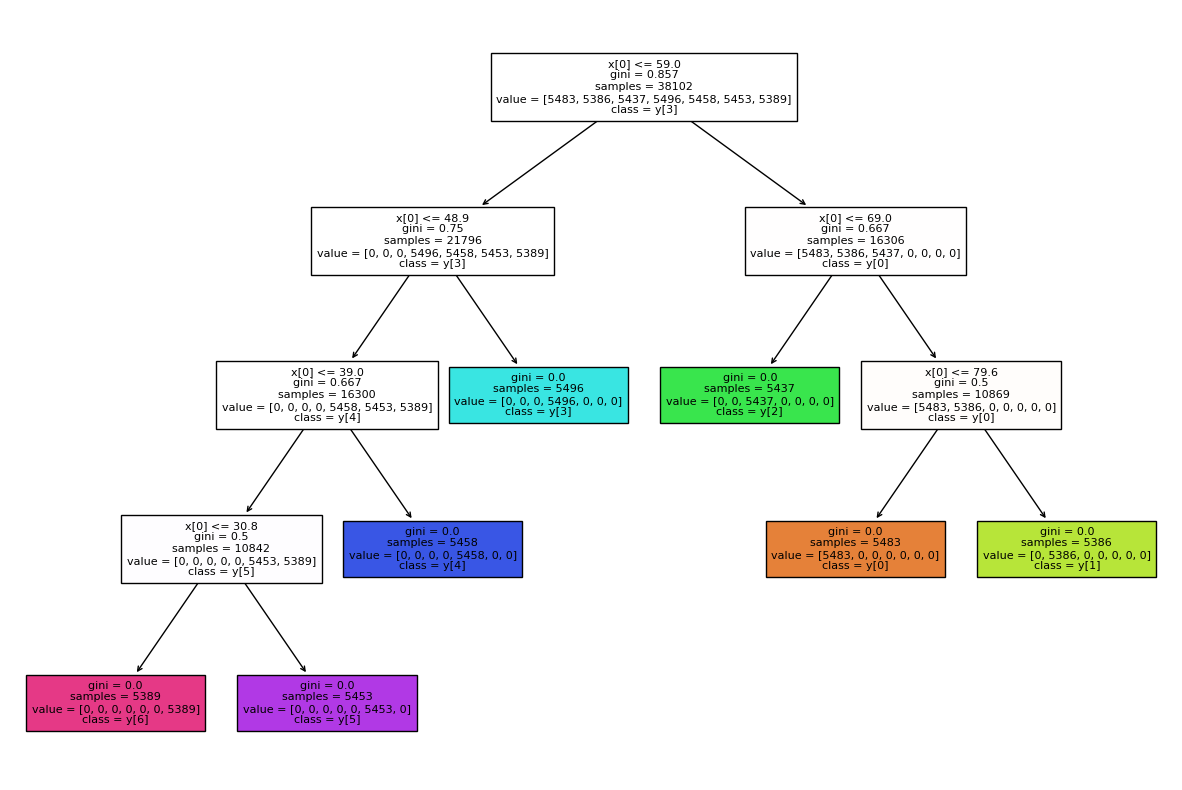

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, class_names=True, fontsize=8)